In [1]:
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

import numpy as np

#from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import matplotlib.pyplot as plt
import seaborn as sns
import shap
shap.initjs()

In [2]:
ordinal = pd.read_csv('../Data/BaseOrdinalSH.csv')
ordinal.shape

(2580, 83)

In [3]:
ordinal.head(3)

,Unnamed: 0,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtCond,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,Unnamed: 0.1,PID,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,1.0,5.0,5.0,6.0,1.0,4.0,1.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,1,909176150,856,126000,68.516053,7890,6,6,1939,1950,0.0,3,3,3,1.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,3,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0
1,1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,1.0,5.0,2.0,0.0,1.0,4.0,1.0,4.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,2,905476230,1049,139500,42.000000,4235,5,5,1984,1984,149.0,4,3,4,2.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,4,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0
2,2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,0.0,5.0,0.0,6.0,1.0,0.0,1.0,4.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,3,911128020,1001,124900,60.000000,6060,5,9,1930,2007,0.0,4,3,3,1.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,4,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0


In [4]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2580, 80)

In [5]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [6]:
GB = GradientBoostingRegressor()

In [7]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [8]:
GB.fit(X, y)

GradientBoostingRegressor()

In [9]:
explainer = shap.TreeExplainer(GB)

In [10]:
shap_values = explainer.shap_values(X)

In [11]:
len(shap_values)

2580

In [12]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[1325,:], X.iloc[1325,:])

In [13]:
SHAP = pd.Series(shap_values[1325], name='Shap Values').to_frame()

In [14]:
features = X.iloc[1325,:].to_frame()

In [15]:
features = features.reset_index()

In [16]:
shap_df = pd.concat([features, SHAP], axis=1)

In [17]:
shap_df.sort_values(by=['Shap Values'], ascending=False)

,index,1325,Shap Values
44,OverallQual,10.0,109151.404858
41,GrLivArea,3627.0,100304.706856
58,2ndFlrSF,1796.0,61098.120925
56,TotalBsmtSF,1930.0,31790.977651
57,1stFlrSF,1831.0,20824.881001
43,LotArea,35760.0,17146.661168
46,YearBuilt,1995.0,13579.845465
51,BsmtQual,5.0,13163.695269
53,BsmtFinSF1,1387.0,12095.796834
52,BsmtExposure,4.0,9474.568807


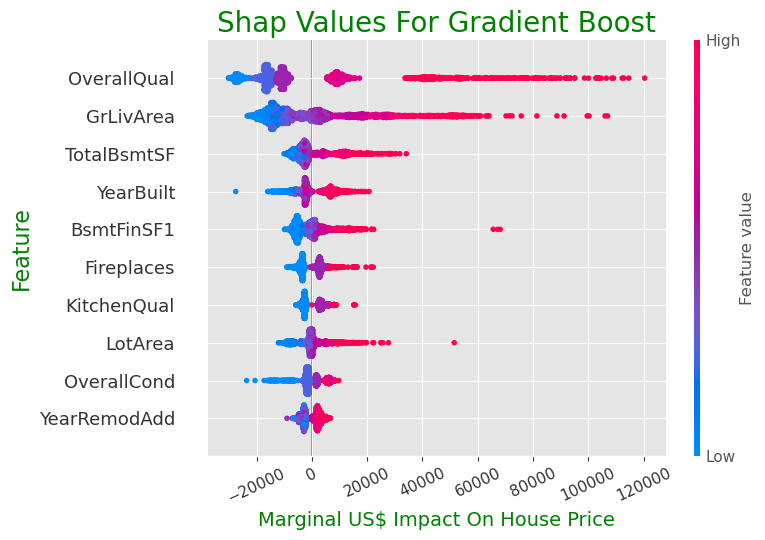

In [18]:
#Shap Global Summary Plot

plt.style.use('default')
plt.style.use('ggplot')

plt.figure(figsize=(8,4))


shap.summary_plot(shap_values, X, show=False, max_display=10)
plt.title('Shap Values For Gradient Boost', fontsize=20, color='Green')

plt.ylabel('Feature', fontsize=16, color='green')
plt.xlabel('Marginal US$ Impact On House Price', fontsize=14, color='green')
plt.xticks(rotation=25)

plt.tight_layout()
plt.show()

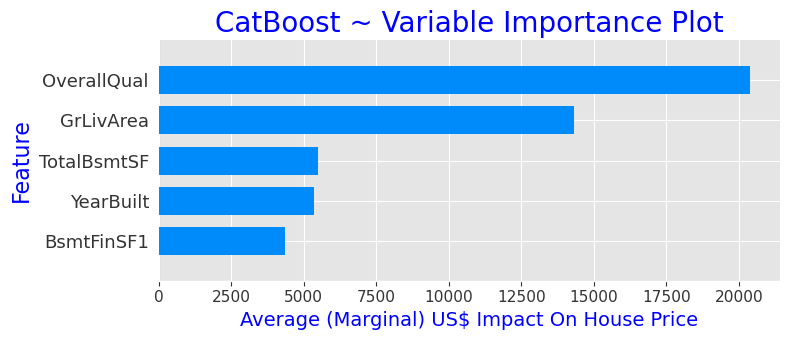

In [19]:
#Variable Importance Plot ~ Global Interpretability

plt.style.use('default')
plt.style.use('ggplot')

plt.figure(figsize=(8,4))

shap.summary_plot(shap_values, X, plot_type='bar', max_display=5, show=False)
#plt.title('CatBoost ~ Variable Importance Plot', color='blue', fontsize=20)

plt.ylabel('Feature', fontsize=16, color='blue')
plt.xlabel('Average (Marginal) US$ Impact On House Price', fontsize=14, color='blue')
plt.title('CatBoost ~ Variable Importance Plot', fontsize=20, color='blue')


plt.tight_layout()
plt.show();

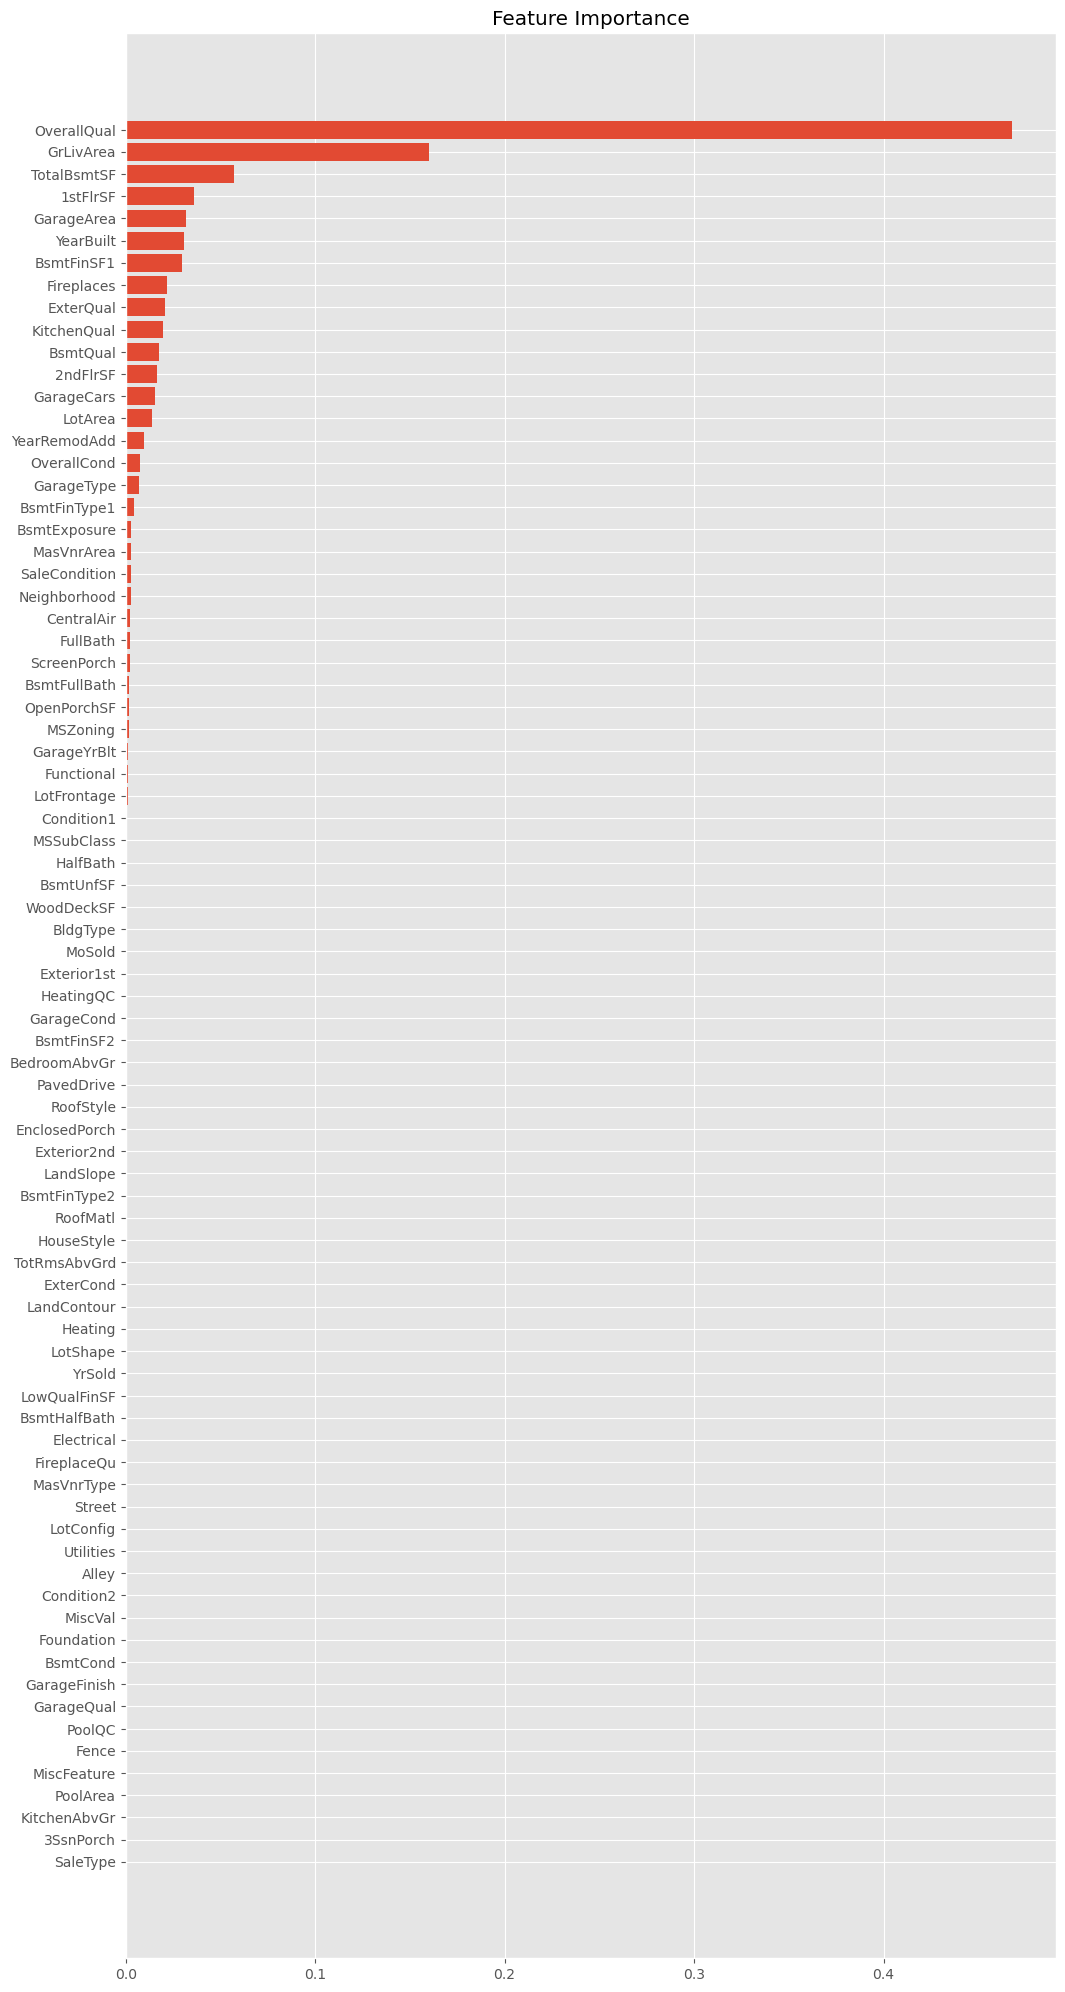

In [20]:
#Scikit Learn Feature Importance:

feature_importance = GB.feature_importances_
sorted_idx = np.argsort(feature_importance)

fig = plt.figure(figsize=(12, 25))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Feature Importance');

In [21]:
X_cols = ordinal.drop(['SalePrice'], axis=1).columns
sorted_importance = sorted(zip(X_cols, GB.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('OverallQual', 0.4675963139206763),
 ('GrLivArea', 0.15999272104878692),
 ('TotalBsmtSF', 0.05715386786058326),
 ('1stFlrSF', 0.03612022485036311),
 ('GarageArea', 0.031765866237555),
 ('YearBuilt', 0.030489002060472267),
 ('BsmtFinSF1', 0.029644001510711407),
 ('Fireplaces', 0.021555098889104212),
 ('ExterQual', 0.020605170013417124),
 ('KitchenQual', 0.019557292778449448),
 ('BsmtQual', 0.017562309094282264),
 ('2ndFlrSF', 0.01649548611519501),
 ('GarageCars', 0.015299531427122225),
 ('LotArea', 0.014053735469172865),
 ('YearRemodAdd', 0.009646336684575117),
 ('OverallCond', 0.007299710693200829),
 ('GarageType', 0.006774801985403395),
 ('BsmtFinType1', 0.004390387420784105),
 ('BsmtExposure', 0.002898878382352555),
 ('MasVnrArea', 0.0028815096713393205),
 ('SaleCondition', 0.0027809117587804188),
 ('Neighborhood', 0.0026120542629003043),
 ('CentralAir', 0.00244169024708337),
 ('FullBath', 0.002280031540372549),
 ('ScreenPorch', 0.002169452984047843),
 ('BsmtFullBath', 0.0017869648

In [22]:
# visualize the training set predictions
#shap.force_plot(explainer.expected_value, shap_values, X)

In [23]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
#shap.dependence_plot("SaleCondition", shap_values, X)